Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


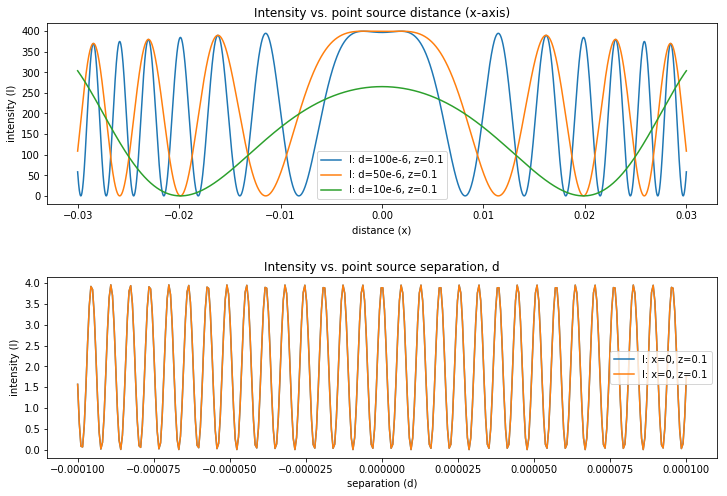

In [4]:
# 5.3.2 Finding the fringes
# Note: increasing x makes the plots spread out
#       increasing z makes the plots asymmetrical (towards left)
%pylab
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def waves_x(points, span=25, d0=5, z0=5):
    d = d0
    Z0 = z0
    I0 = 1
    PI = np.pi
    LAMBDA = 632.8e-9
    POINTS = points
    D_MAX = span
    k=10**7

    X0 = linspace(-1 * D_MAX, D_MAX, num=POINTS)
    i0 = 1/(X0**2 + Z0**2)
    i1 = 1/(X0**2 + (Z0 + d)**2)
    i2 = 2/np.sqrt((X0**2+Z0**2)*(X0**2 + (Z0 + d)**2))
    i = I0 * (i0 + i1 + i2 * np.cos(2*PI/LAMBDA*(np.sqrt(X0**2+(d+Z0)**2)-np.sqrt(X0**2+Z0**2))))
    return (X0, i)


def waves_d(points, span=25, x0=5, z0=5):
    X0 = x0
    Z0 = z0
    I0 = 1
    PI = np.pi
    LAMBDA = 632.8e-9
    POINTS = points
    D_MAX = span
    k=10**7


    d = linspace(-1 * D_MAX, D_MAX, num=POINTS)
    i0 = 1/(X0**2 + Z0**2)
    i1 = 1/(X0**2 + (Z0 + d)**2)
    i2 = 2/np.sqrt((X0**2+Z0**2)*(X0**2 + (Z0 + d)**2))
    i = I0 * (i0 + i1 + i2 * np.cos(2*PI/LAMBDA*(np.sqrt(X0**2+(d+Z0)**2)-np.sqrt(X0**2+Z0**2))))

    return (d, i)


SUBPLOT_SIZE = 2
fig = plt.figure("title",figsize=(12,8))
fig.tight_layout()
plt.subplots_adjust(hspace=0.4)

sub = fig.add_subplot(SUBPLOT_SIZE, 1, 1)
sub.set_xlabel("distance (x)")
sub.set_ylabel("intensity (I)")
sub.set_title("Intensity vs. point source distance (x-axis)")
x, I = waves_x(5001, span=0.03, d0=100e-6,z0=0.1)
sub.plot(x,I,label="I: d=100e-6, z=0.1")
x, I = waves_x(5001, span=0.03, d0=50e-6,z0=0.1)
sub.plot(x,I,label="I: d=50e-6, z=0.1")
x, I = waves_x(5001, span=0.03, d0=10e-6,z0=0.1)
sub.plot(x,I,label="I: d=10e-6, z=0.1")
sub.legend()

sub = fig.add_subplot(SUBPLOT_SIZE, 1, 2)
sub.set_xlabel("separation (d)")
sub.set_ylabel("intensity (I)")
sub.set_title("Intensity vs. point source separation, d")
d, I = waves_d(368, span=1e-4, x0=1, z0=0.1)
sub.plot(d,I,label="I: x=0, z=0.1")
d, I = waves_d(368, span=1e-4, x0=1, z0=0.1)
sub.plot(d,I,label="I: x=0, z=0.1")
sub.legend()